In [1]:
import os
import warnings
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey
from fuzzywuzzy import process

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [2]:
students_path = "./major_minor/students.csv"

In [3]:
df = pd.read_csv(students_path)
df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa
0,ASP 2017-18,aania_asp18@ashoka.edu.in,UG-14-1609,Aania,Graduated,NaN,NaN,ASP,2018.0,2.64,0.0
1,ASP 2017-18,aashna.lal_asp18@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,NaN,CW,ASP,2018.0,3.36,0.0
2,ASP 2017-18,abhinav.srikant_asp18@ashoka.edu.in,UG-14-1833,Abhinav Srikant,Graduated,PSY,MS,ASP,2018.0,3.14,0.0
3,ASP 2017-18,aditya.prakash_asp18@ashoka.edu.in,UG-14-1812,Aditya Prakash,Graduated,NaN,MAT,ASP,2018.0,3.57,0.0
4,ASP 2017-18,ahan.bezbaroa_asp18@ashoka.edu.in,UG-14-0336,Ahan Bezbaroa,Graduated,PPE,ENG,ASP,2018.0,3.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7001,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,0.0
7002,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,0.0
7003,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,0.0
7004,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,0.0


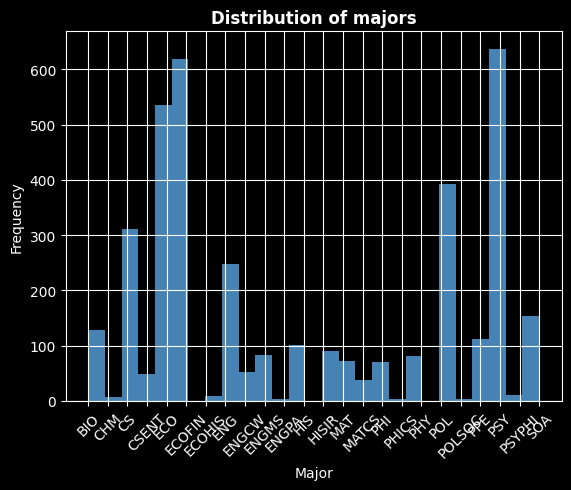

In [4]:
df = df.sort_values(by=['major'])
df = df[df["status"] != "Early Exit"].reset_index(drop=True)

ax = df[df["program"] == "UG"]["major"].hist(bins=df["major"].nunique(), color="steelblue")
ax.set_title('Distribution of majors', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

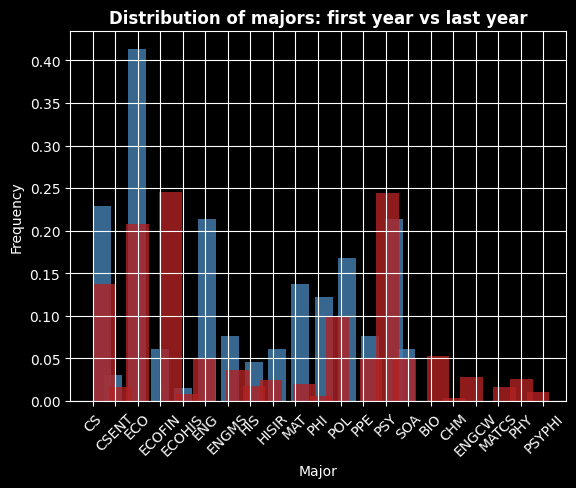

In [5]:
df = df.sort_values(by=["grad", "major"])

ax = df[df["batch"] == "UG 2014-17"]["major"].hist(bins=df["major"].nunique(), width=0.8, color="steelblue", density=True, alpha=0.8)
ax2 = df[df["batch"] == "UG 2021-24"]["major"].hist(bins=df["major"].nunique(), width=1, color="firebrick", density=True, alpha=0.8)
ax.set_title('Distribution of majors: first year vs last year', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

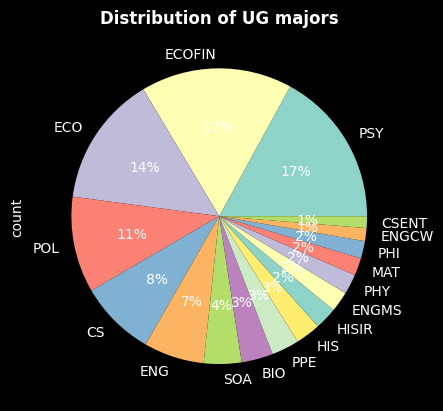

In [6]:
ax = df[df["program"] == "UG"]["major"].value_counts().iloc[:17].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of UG majors', weight='bold')
plt.show()

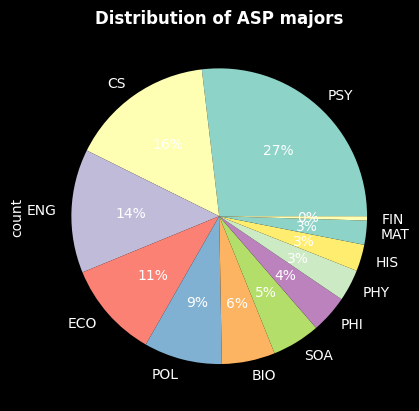

In [7]:
ax = df[df["program"] == "ASP"]["major"].value_counts().iloc[:12].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of ASP majors', weight='bold')
plt.show()

In [8]:
ugs = df[df["program"] == "UG"]
asps = df[df["program"] == "ASP"]

asps["ug_grad"] = asps["grad"] - 1
asps["major"] = asps["major"] + " "
asps["minor"] = asps["minor"].apply(lambda x: x.replace(",", " ,") if (not pd.isna(x) and type(x) == str and "," in x) else x + " " if not pd.isna(x) else None)

In [9]:
all_people = pd.merge(ugs, asps, how="left", left_on=["name", "grad"], right_on=["name", "ug_grad"], suffixes=("_ug", "_asp"))
all_people["subject_asp"] = all_people.apply(lambda x: x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else x["major_asp"] if not pd.isna(x["major_asp"]) else None, axis=1)
all_people["major_asp"] = all_people.apply(lambda x: x["major_asp"] if not pd.isna(x["major_asp"]) else x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else None, axis=1)

all_people

,batch_ug,email_ug,id_ug,name,status_ug,major_ug,minor_ug,program_ug,grad_ug,cgpa_ug,...,id_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,cgpa_asp,mgpa_asp,ug_grad,subject_asp
0,UG 2014-17,vijay.lingam@ashoka.edu.in,UG-14-2129,Vijay Lingam,Graduated,CS,NaN,UG,2017.0,3.41,...,UG-14-2129,Graduated,None,None,ASP,2018.0,3.41,0.0,2017.0,None
1,UG 2014-17,shreyash.krishna@ashoka.edu.in,UG-14-2508,Shreyash Krishna,Graduated,CS,NaN,UG,2017.0,3.24,...,UG-14-2508,Graduated,CS,None,ASP,2018.0,3.73,0.0,2017.0,CS
2,UG 2014-17,ujjwal.yadav@ashoka.edu.in,UG-14-0707,Ujjwal Yadav,Graduated,CS,NaN,UG,2017.0,2.50,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
3,UG 2014-17,vivek.madala@ashoka.edu.in,UG-14-1920,Deva Surya Vivek Madala,Graduated,CS,ECO,UG,2017.0,3.55,...,UG-14-1920,Graduated,CS,None,ASP,2018.0,3.55,0.0,2017.0,CS
4,UG 2014-17,yash.joshi@ashoka.edu.in,UG-14-2145,Yash Joshi,Graduated,CS,NaN,UG,2017.0,3.35,...,UG-14-2145,Graduated,CS,None,ASP,2018.0,3.35,0.0,2017.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4665,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4666,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4667,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None


In [10]:
all_people["major_asp"] = all_people["major_asp"].fillna("None")
all_people["minor_ug"] = all_people["minor_ug"].fillna("None")
all_people["minor_asp"] = all_people["minor_asp"].fillna("None")
all_people["subject_asp"] = all_people["subject_asp"].fillna("None")
people = all_people[~all_people["status_asp"].isnull()]

In [11]:
flows = list((people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

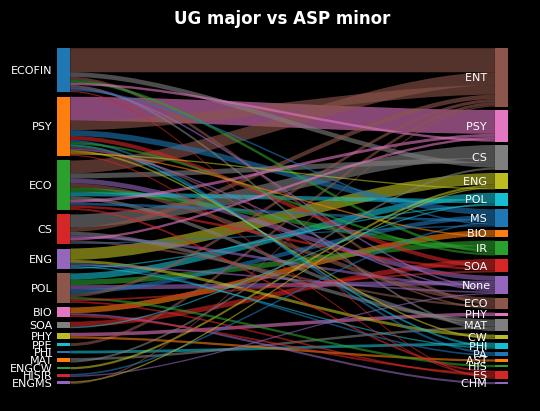

In [12]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor", weight="bold")
s.draw()

In [13]:
level1 = sorted([(key, value) for key, value in people["major_ug"].value_counts().items()], key=lambda x: x[1],
                reverse=True)[:18]
level2 = sorted([(key, value) for key, value in people["major_asp"].value_counts().items()], key=lambda x: x[1],
                reverse=True)[:16]
flows = list((people[["major_ug", "major_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["major_asp"], x["count"]), axis=1))[:45]

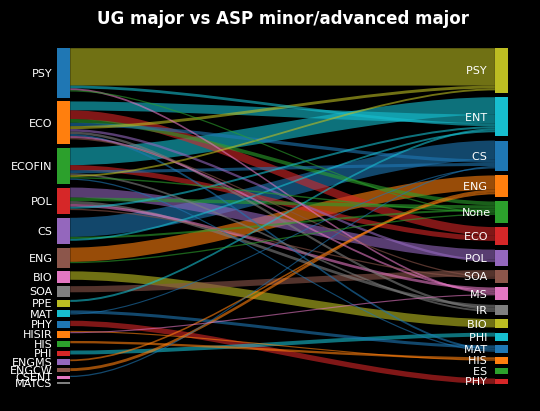

In [14]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/advanced major", weight="bold")
s.draw()

In [15]:
flows = list((all_people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

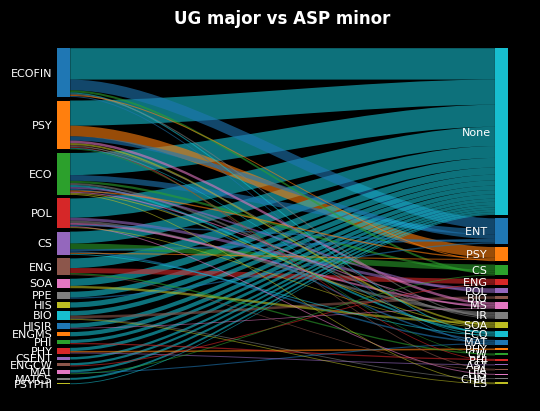

In [16]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor", weight="bold")
s.draw()

In [17]:
level1 = sorted([(key, value) for key, value in all_people["major_ug"].value_counts().items()], key=lambda x: x[1],
                reverse=True)[:18]
level2 = sorted([(key, value) for key, value in all_people["major_asp"].value_counts().items()], key=lambda x: x[1],
                reverse=True)[:16]
flows = list((all_people[["major_ug", "major_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["major_asp"], x["count"]), axis=1))[:45]

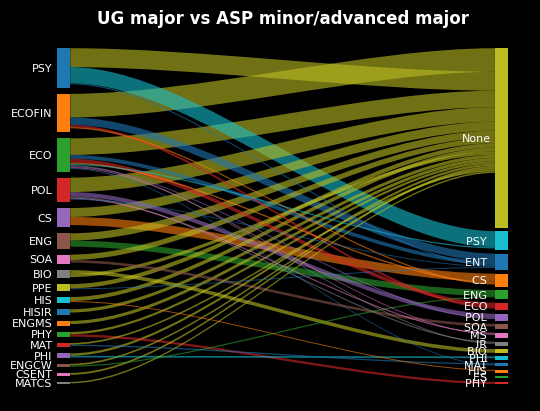

In [18]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/advanced major", weight="bold")
s.draw()

In [19]:
asp_counts = all_people[["batch_ug", "status_asp", "grad_ug", "major_ug"]].fillna("None").value_counts().reset_index(drop=False).sort_values(by=["batch_ug"])
asp_counts = asp_counts[(asp_counts["status_asp"] != "Not Graduated") & (asp_counts["grad_ug"] < 2025)]
asp_share = (asp_counts.groupby(["batch_ug", "status_asp", "grad_ug", "major_ug"])["count"].sum() / asp_counts.groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum() * 100).reset_index()
asp_share = asp_share[asp_share["status_asp"] != "None"].groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum().reset_index().sort_values(by=["major_ug", "batch_ug"])
asp_share

,batch_ug,grad_ug,major_ug,count
41,UG 2017-20,2020.0,BIO,80.000000
59,UG 2018-21,2021.0,BIO,62.500000
77,UG 2019-22,2022.0,BIO,84.000000
97,UG 2020-23,2023.0,BIO,75.000000
117,UG 2021-24,2024.0,BIO,73.076923
...,...,...,...,...
58,UG 2017-20,2020.0,SOA,65.000000
76,UG 2018-21,2021.0,SOA,36.842105
96,UG 2019-22,2022.0,SOA,33.333333
116,UG 2020-23,2023.0,SOA,65.517241


In [20]:
means = asp_share.groupby("major_ug")["count"].mean().sort_values(ascending=False)
means

major_ug
POLSOC    100.000000
PHICS     100.000000
MAT        76.354167
PHY        75.040293
ECOHIS     75.000000
CHM        75.000000
BIO        74.915385
CSENT      70.714286
CS         70.611850
ENGPA      66.666667
ENG        63.260283
PSY        61.534987
ENGCW      60.021978
ECO        58.786914
PHI        54.709576
HISIR      54.270833
PPE        53.904277
POL        53.372009
ECOFIN     53.279727
HIS        51.860882
SOA        50.884669
ENGMS      50.735480
MATCS      47.333333
PSYPHI     20.000000
Name: count, dtype: float64

In [21]:
means = asp_share[asp_share["grad_ug"] > 2020].groupby("major_ug")["count"].mean().sort_values(ascending=False)
means

major_ug
PHICS     100.000000
ECOHIS     75.000000
CHM        75.000000
BIO        73.644231
PHY        72.967033
HISIR      70.000000
MAT        69.722222
PSY        66.683096
ENGPA      66.666667
CS         65.768669
ENGCW      65.027473
ENG        62.591995
ECO        61.260086
ECOFIN     59.228106
CSENT      58.750000
POL        57.714297
HIS        56.148504
PPE        56.068627
PHI        52.893773
ENGMS      51.527778
SOA        50.923170
MATCS      46.666667
PSYPHI     20.000000
Name: count, dtype: float64

In [22]:
means2 = asp_share[(asp_share["grad_ug"] <= 2020) & (asp_share["grad_ug"] > 2017)].groupby("major_ug")["count"].mean().sort_values(ascending=False)
means2

major_ug
POLSOC    100.000000
MAT        84.722222
PHY        83.333333
BIO        80.000000
CSENT      80.000000
CS         71.717818
ENG        59.047619
PHI        53.928571
PSY        53.753933
ECO        51.628200
MATCS      50.000000
ENGMS      46.590909
POL        44.160839
HIS        41.208791
ENGCW      40.000000
SOA        38.750000
ECOFIN     38.108466
PPE        35.653236
HISIR      34.722222
Name: count, dtype: float64

In [23]:
(means - means2).dropna().sort_values()

major_ug
CSENT    -21.250000
MAT      -15.000000
PHY      -10.366300
BIO       -6.355769
CS        -5.949148
MATCS     -3.333333
PHI       -1.034799
ENG        3.544376
ENGMS      4.936869
ECO        9.631887
SOA       12.173170
PSY       12.929163
POL       13.553458
HIS       14.939713
PPE       20.415392
ECOFIN    21.119640
ENGCW     25.027473
HISIR     35.277778
Name: count, dtype: float64

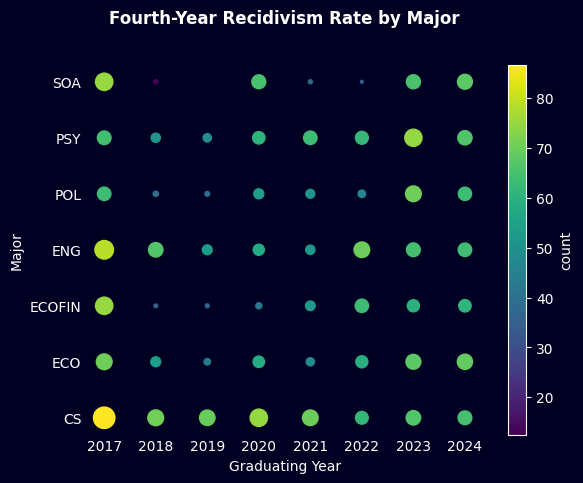

<Figure size 640x480 with 0 Axes>

In [24]:
asp_share = asp_share[asp_share["major_ug"].isin(["ENG", "CS", "ECO", "ECOFIN", "PSY", "POL", "SOA"])]
asp_share["count2"] = asp_share["count"].apply(lambda x: ((float(x)-25)/4)**2)

ax = asp_share.plot(kind="scatter", x="grad_ug", y="major_ug", c="count", s="count2")
plt.title('Fourth-Year Recidivism Rate by Major', weight="bold", fontsize=12, pad=30)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('Major', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

In [25]:
plt.figure(figsize=(9, 6))
ax = df[df["program"] == "UG"].groupby(["batch"])["batch"].count().plot(kind='line', linewidth=3, fontsize=10, color="firebrick", logy=False)
plt.title('Batch Size Over the Years', weight="bold", fontsize=12)

import matplotlib.ticker as ticker
# ax.plot(np.array(ax.get_xlim()), np.array(ax.get_ylim()), '--', color='lightcoral', linewidth=1)
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Batch', fontsize=10)
plt.ylabel('Batch Size', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

In [26]:
counts = df[(df["program"] == "UG")].groupby(["batch"]).count()
cagr = counts.iloc[:, 0:2].pct_change().add(1).prod().pow(1./(len(counts.columns) - 1)).sub(1) * 100
cagr

email    21.884336
id       21.884336
dtype: float64

In [27]:
ug17 = df[(df["batch"] == "UG 2014-17") | (df["batch"] == "UG 2014-17")]
ug24 = df[(df["batch"] == "UG 2021-24") | (df["batch"] == "UG 2021-24")]
majors = ['PSY', 'ECOFIN', 'ECO', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'PPE', 'ENGMS', 'ENGCW', 'PHY', 'MAT', 'HISIR', 'PHI', 'HIS', 'CSENT', 'MATCS']

ug17["major"] = ug17["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: x if x in majors else "Other")
ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()

majorcolors = {label: color  for label, color in zip(['ECO', 'CS', 'ENG', 'PSY', 'POL', 'Other', 'MAT', 'PHI', 'ENGMS', 'PPE', 'ECOFIN', 'HISIR', 'SOA', 'HIS','CSENT',  'MATCS', 'BIO', 'ENGCW', 'PHY'], (plt.get_cmap('viridis')(i / 16) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate majors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["major"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["major"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

# plt.show()
plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1200x600 with 0 Axes>

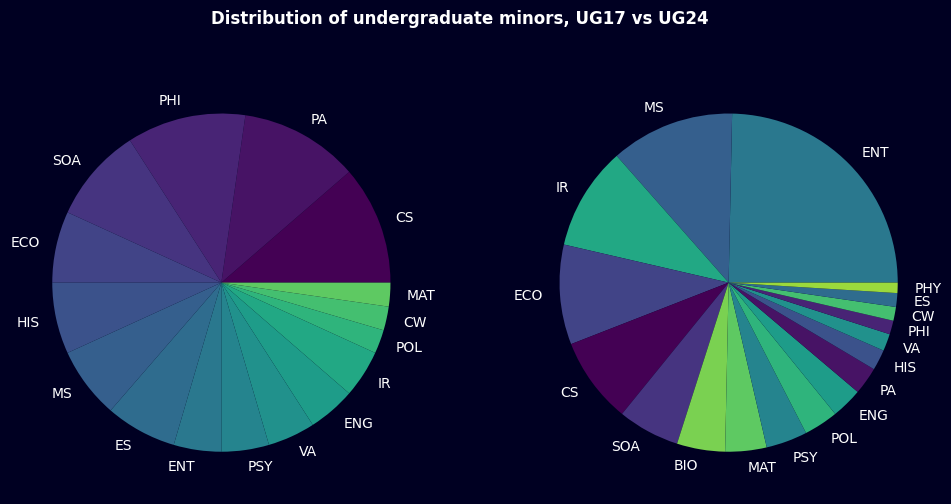

In [28]:
minors = ['PSY', 'ECO', 'FIN', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'MS', 'CW', 'PHY', 'MAT', 'IR', 'PHI', 'HIS', 'ENT', 'VA', 'PA', 'ES']

ug17["minor"] = ug17["minor"].apply(lambda x: x if x in minors else "None")
ug24["minor"] = ug24["minor"].apply(lambda x: x if x in minors else "None")
ug17values = ug17[ug17["minor"] != "None"]["minor"].value_counts()
ug24values = ug24[ug24["minor"] != "None"]["minor"].value_counts()

minorcolors = {label: color  for label, color in zip(['CS', 'PA', 'PHI', 'SOA', 'ECO', 'HIS', 'MS', 'ES', 'ENT', 'PSY', 'VA', 'ENG', 'IR', 'POL', 'CW', 'MAT', 'BIO', 'PHY', 'None'], (plt.get_cmap('viridis')(i / 20) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate minors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[minorcolors[v] for v in ug17values.keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[minorcolors[v] for v in ug24values.keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

In [29]:
ug25 = df[df["batch"] == "UG 2022-26"]
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug17)*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(ug25[ug25["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug25[ug25["major"].notna()])*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 35.714285714285715
Share of ECO/ECOFIN/PSY majors in 2024: 53.597122302158276


In [30]:
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 35.714285714285715
Share of ECO/ECOFIN/PSY majors in 2018: 46.22222222222222
Share of ECO/ECOFIN/PSY majors in 2019: 44.03669724770643
Share of ECO/ECOFIN/PSY majors in 2020: 40.266666666666666
Share of ECO/ECOFIN/PSY majors in 2021: 43.18181818181818
Share of ECO/ECOFIN/PSY majors in 2022: 45.13888888888889
Share of ECO/ECOFIN/PSY majors in 2023: 48.747591522158
Share of ECO/ECOFIN/PSY majors in 2024: 51.56482861400894
Share of ECO/ECOFIN/PSY majors in 2025: 53.597122302158276


In [31]:
print(f'Share of ECOFIN majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECOFIN majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECOFIN majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECOFIN majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECOFIN majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECOFIN majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECOFIN majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECOFIN majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECOFIN majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECOFIN"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECOFIN majors in 2017: 3.1746031746031744
Share of ECOFIN majors in 2018: 12.444444444444445
Share of ECOFIN majors in 2019: 11.009174311926607
Share of ECOFIN majors in 2020: 10.666666666666668
Share of ECOFIN majors in 2021: 12.5
Share of ECOFIN majors in 2022: 14.756944444444445
Share of ECOFIN majors in 2023: 16.377649325626205
Share of ECOFIN majors in 2024: 18.181818181818183
Share of ECOFIN majors in 2025: 29.496402877697843


In [32]:
print(f'Share of ECO majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECO majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECO majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECO majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECO majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECO majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECO majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECO majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECO majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECO"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECO majors in 2017: 21.428571428571427
Share of ECO majors in 2018: 19.11111111111111
Share of ECO majors in 2019: 16.207951070336392
Share of ECO majors in 2020: 13.333333333333334
Share of ECO majors in 2021: 15.0
Share of ECO majors in 2022: 12.5
Share of ECO majors in 2023: 15.606936416184972
Share of ECO majors in 2024: 15.350223546944857
Share of ECO majors in 2025: 7.194244604316546


In [33]:
print(f'Share of PSY majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of PSY majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of PSY majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of PSY majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of PSY majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of PSY majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of PSY majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of PSY majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of PSY majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["PSY"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of PSY majors in 2017: 11.11111111111111
Share of PSY majors in 2018: 14.666666666666666
Share of PSY majors in 2019: 16.819571865443425
Share of PSY majors in 2020: 16.266666666666666
Share of PSY majors in 2021: 15.681818181818183
Share of PSY majors in 2022: 17.881944444444446
Share of PSY majors in 2023: 16.76300578034682
Share of PSY majors in 2024: 18.0327868852459
Share of PSY majors in 2025: 16.906474820143885


In [34]:
print(f'Number of Economics majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO"])])}')
print(f'Number of Economics majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN", "ECO"])])}')

Number of Economics majors in 2017: 31
Number of Economics majors in 2024: 225


In [35]:
print(f'Number of Psych majors in 2017: {len(ug17[ug17["major"].isin(["PSY"])])}')
print(f'Number of Psych majors in 2024: {len(ug24[ug24["major"].isin(["PSY"])])}')

Number of Psych majors in 2017: 14
Number of Psych majors in 2024: 121


In [36]:
print(f'Share of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug17)*100}')
print(f'Share of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug24)*100}')

Share of English majors in 2017: 15.079365079365079
Share of English majors in 2024: 8.49478390461997


In [37]:
print(f'Number of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')
print(f'Number of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')

Number of English majors in 2017: 19
Number of English majors in 2024: 57


In [38]:
asp17 = df[df["batch"] == "ASP 2017-18"]
asp25 = df[df["batch"] == "ASP 2024-25"]
print(f'Share of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])/len(ug17)*100}')
print(f'Share of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])/len(ug24)*100}')

Share of ENT minors in 2017: 1.5873015873015872
Share of ENT minors in 2024: 11.177347242921014


In [39]:
print(f'Number of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])}')
print(f'Number of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])}')

Number of ENT minors in 2017: 2
Number of ENT minors in 2024: 75


In [40]:
print(f'Humanities majors on campus in 2016-17: {df[(df["grad"] < 2020) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'Humanities majors on campus in 2022-23: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

Humanities majors on campus in 2016-17: 51.40607424071991
Humanities majors on campus in 2022-23: 31.783601014370245


In [41]:
print(f'STEM majors on campus in 2019: {df[(df["grad"] < 2020) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'STEM majors on campus in 2022: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

STEM majors on campus in 2019: 17.09786276715411
STEM majors on campus in 2022: 22.31614539306847


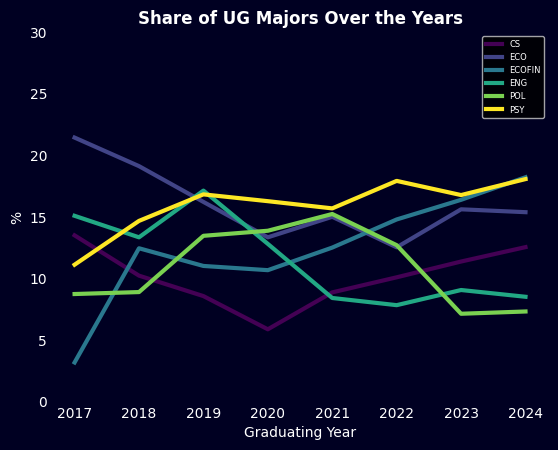

In [42]:
df["major"] = df["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else "HIS" if x in ["HIS", "HISIR"] else x)
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of UG Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 30)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

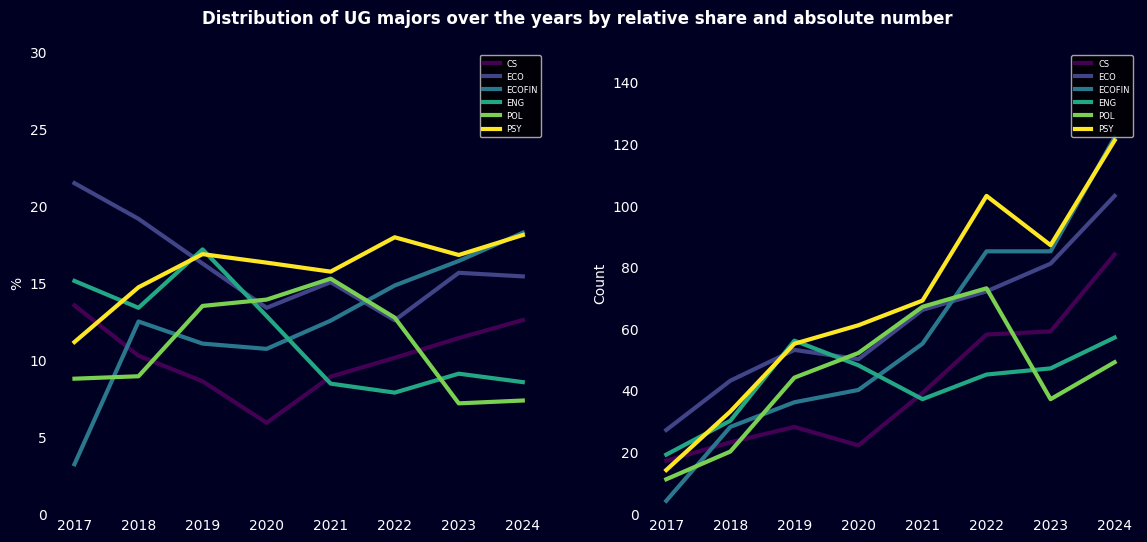

In [43]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df_count = category_counts.pivot(index='grad', columns='major', values='count').fillna(0)
pivot_df_share = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Distribution of UG majors over the years by relative share and absolute number", weight="bold", x=0.5, y=0.95, fontsize=12)

pivot_df_share.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])

axes[0].set_ylim(0, 30)
axes[0].set_ylabel("%", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

In [44]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of STEM Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

In [45]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Humanities Majors Over the Years', weight="bold", fontsize=12, pad=40)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(10, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/humanities.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1000x600 with 0 Axes>

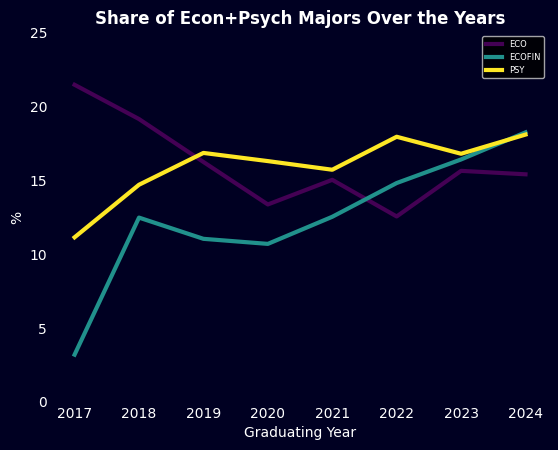

In [46]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Econ+Psych Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 25)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

In [47]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100

core_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of UG majors over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1400x600 with 0 Axes>

In [48]:
def fuzzy_merge(df_1, df_name, key1, key2, threshold=90, limit=3):

    column = df_name[key2].tolist()

    matches = df_1[key1].apply(lambda x: process.extract(x, column, limit=limit))
    df_1['matches'] = matches

    m2 = df_1['matches'].apply(lambda x: ', '.join([str(i[0]) for i in x if i[1] >= threshold]).split(",")[0])
    m2 = m2.apply(lambda x: x if x != "nan" else "")
    df_1['matches'] = m2

    def get_probability(x):
        if x in df_name[key2].values:
            return df_name.loc[df_name[key2] == x, "Male Probability"].values[0]
        return None

    df_1['probability'] = df_1['matches'].apply(get_probability)

    return df_1

In [49]:
# name_gender = pd.read_csv("./gender/indian_first_names.csv").drop(["Index", "Count"], axis=1)
# name_gender["Name"] = name_gender["Name"].apply(lambda x: x.capitalize())
# df["first_name"] = df["name"].apply(lambda x: x.split(" ")[0])
# gender_df = fuzzy_merge(df, name_gender, 'first_name', 'Name', threshold=60)
# gender_df["gender"] = gender_df["probability"].apply(lambda x: "male" if x > 0.8 else "female")
# gender_df.to_csv("./gender_students.csv")
gender_df = pd.read_csv("./gender/gender_df.csv", index_col=0)
gender_df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa,gender,first_name,matches,probability
321,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017,3.28,3.28,female,Shivangi,Shivangi,0.0
415,UG 2014-17,samridh.kudesia@ashoka.edu.in,UG-14-1375,Samridh Kudesia,Graduated,CS,POL,UG,2017,3.16,3.08,female,Samridh,Samridhi,0.0
727,UG 2014-17,mihika.sood@ashoka.edu.in,UG-14-1617,Mihika Sood,Graduated,CS,ENT,UG,2017,2.74,2.43,female,Mihika,Ishika,0.0
907,UG 2014-17,krathika.parchani@ashoka.edu.in,UG-14-0063,Krathika Parchani,Graduated,ECO,NaN,UG,2017,3.63,3.64,female,Krathika,Kratika,0.0
969,UG 2014-17,smera.dania@ashoka.edu.in,UG-14-3381,Smera Dania,Graduated,ECO,NaN,UG,2017,3.10,3.04,female,Smera,Era,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,UG 2023-27,vivaan.majumder_ug2023@ashoka.edu.in,1020231735,Vivaan Majumder,Enrolled,NaN,NaN,UG,2027,3.44,0.00,male,Vivaan,Vivian,1.0
6674,UG 2023-27,yashwanth.bommareddy_ug2023@ashoka.edu.in,1020231745,Yashwanth Vema Reddy Bommareddy,Enrolled,NaN,NaN,UG,2027,3.50,0.00,male,Yashwanth,Yashwanth,1.0
6677,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027,3.19,0.00,male,Yuvraj,Yuvraj,1.0
6678,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027,0.00,0.00,male,Zahra,Abhra,1.0


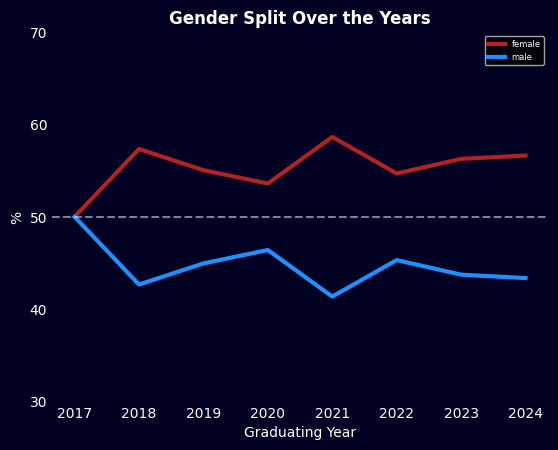

In [50]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

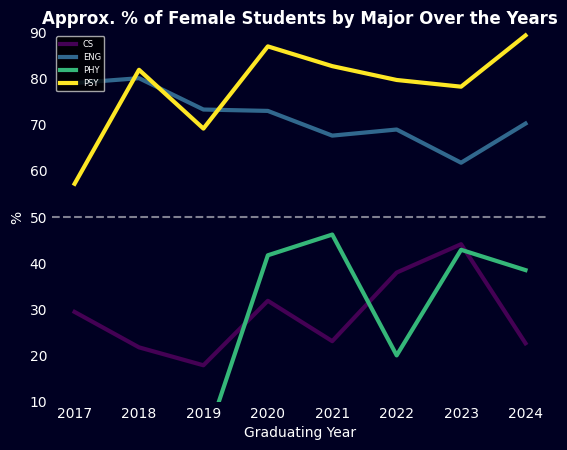

In [51]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["PHY", "PSY", "CS", "ENG"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(10, 90)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

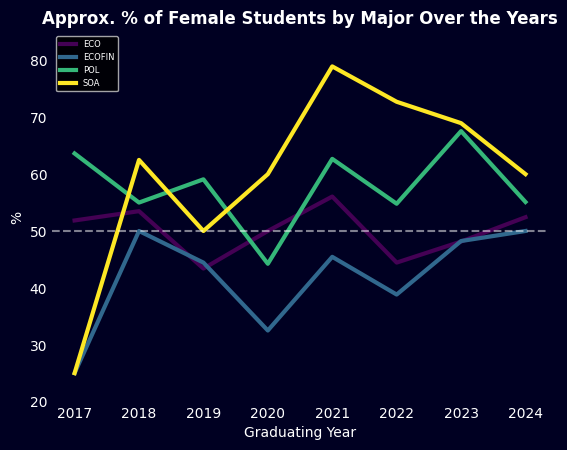

In [52]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["POL", "ECO", "ECOFIN", "SOA"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(20, 85)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

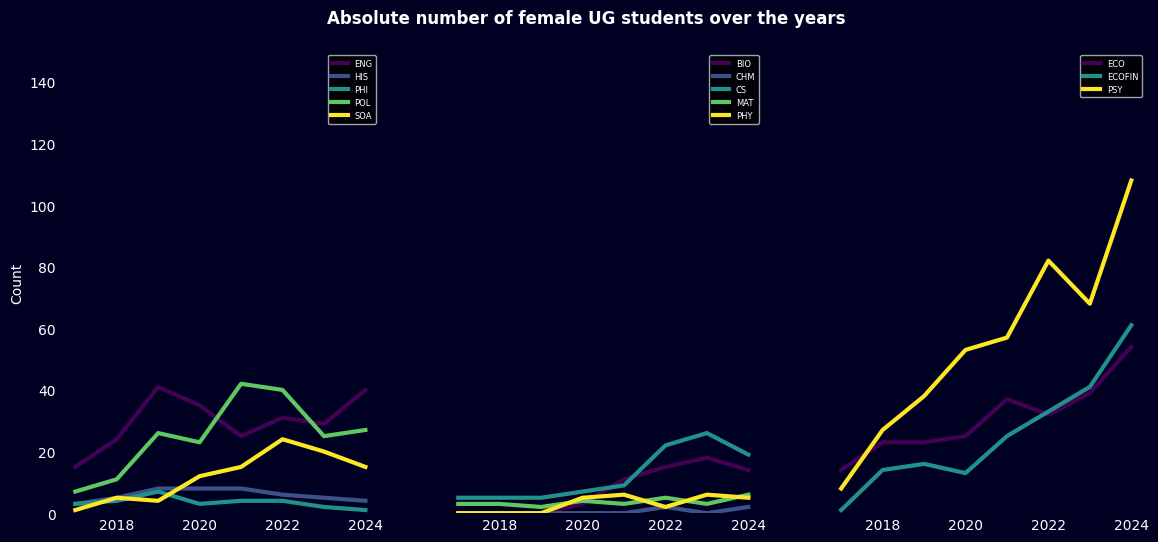

In [53]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of female UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

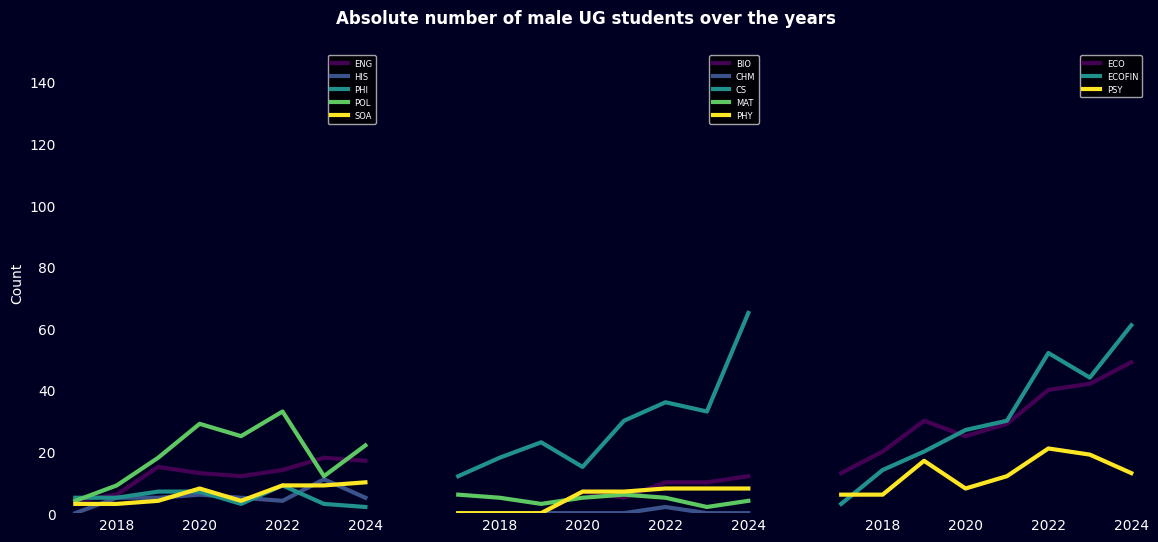

In [54]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "male"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of male UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

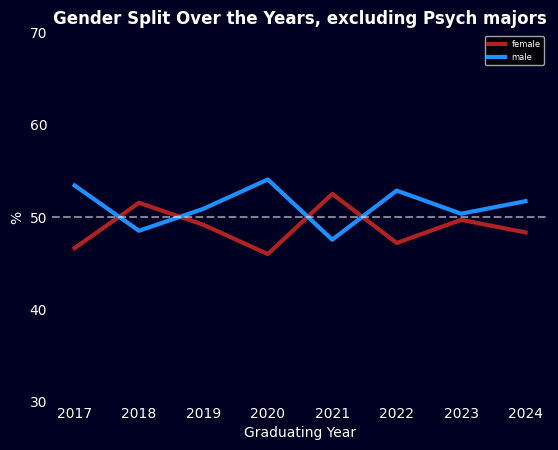

In [55]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG") & ~((gender_df["major"] == "PSY") & (gender_df["gender"] == "female"))].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage')

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years, excluding Psych majors', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

In [56]:
df["minor"] = df["minor"].apply(lambda x: x.split(",")[0] if "," in str(x) else x)
minor_share = (df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts() / df[df["program"] == "UG"].groupby(["batch", "grad"])["batch"].value_counts() * 100).reset_index()
minor_share["abs"] = df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts().reset_index()["count"]
minor_share = minor_share[(minor_share["grad"] < 2025) & (minor_share["abs"] >= 3)]
minor_share["type"] = minor_share["minor"].apply(lambda x: "STEM" if x in ["PHY", "BIO", "CS", "MAT", "CHM"] else "Humanities" if x in ["ENG", "CW", "CHI", "ES", "SOA", "PHI", "HIS", "IR", "POL"] else "MS,PA,VA" if x in ["MS", "PA", "VA"] else "ECO,PSY" if x in ["ECO", "PSY"] else x)
minor_share

,batch,grad,minor,count,abs,type
0,UG 2014-17,2017.0,None,62.698413,79,None
1,UG 2014-17,2017.0,CS,3.968254,5,STEM
2,UG 2014-17,2017.0,PA,3.968254,5,"MS,PA,VA"
3,UG 2014-17,2017.0,PHI,3.968254,5,Humanities
4,UG 2014-17,2017.0,SOA,3.174603,4,Humanities
...,...,...,...,...,...,...
152,UG 2021-24,2024.0,PHI,0.894188,6,Humanities
153,UG 2021-24,2024.0,CW,0.596125,4,Humanities
154,UG 2021-24,2024.0,ES,0.596125,4,Humanities
155,UG 2021-24,2024.0,CHI,0.447094,3,Humanities


In [57]:
minortype_share = minor_share.groupby(["type", "grad", "batch"])["count"].sum().reset_index()
minortype_share

,type,grad,batch,count
0,"ECO,PSY",2017.0,UG 2014-17,2.380952
1,"ECO,PSY",2018.0,UG 2015-18,5.333333
2,"ECO,PSY",2019.0,UG 2016-19,7.339450
3,"ECO,PSY",2020.0,UG 2017-20,5.600000
4,"ECO,PSY",2021.0,UG 2018-21,5.000000
5,"ECO,PSY",2022.0,UG 2019-22,6.770833
6,"ECO,PSY",2023.0,UG 2020-23,5.587669
7,"ECO,PSY",2024.0,UG 2021-24,6.408346
8,ENT,2018.0,UG 2015-18,2.666667
9,ENT,2019.0,UG 2016-19,4.281346


In [58]:
plt.figure(figsize=(9, 6))

ax = minortype_share[minortype_share["type"].isin(["Humanities", "ENT", "None"])].pivot(index='grad', columns='type', values='count').plot(kind='line', linewidth=3, fontsize=10, logy=False, legend=True, cmap="viridis_r")
plt.title('Share of UG Minors/Concentrations over the years', weight="bold", fontsize=12, pad=20)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.legend(title="", fontsize=8)
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)
plt.gcf().set_size_inches(10, 6)

# plt.show()
plt.savefig(f"./major_minor/minors.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [89]:
nz_df = df[df["minor"].notna()]
level1 = sorted([(key, value) for key, value in nz_df["major"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
level2 = sorted([(key, value) for key, value in nz_df["minor"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
flows = list((nz_df[["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"], x["minor"], x["count"]), axis=1))
flows

[('POL', 'IR', 161),
 ('PSY', 'ENT', 104),
 ('ECOFIN', 'ENT', 99),
 ('ECO', 'IR', 68),
 ('PSY', 'MS', 66),
 ('PSY', 'SOA', 62),
 ('PSY', 'BIO', 59),
 ('ECO', 'ENT', 56),
 ('CS', 'MAT', 50),
 ('ENG', 'CW', 46),
 ('PSY', 'ECO', 45),
 ('ECO', 'CS', 44),
 ('CS', 'ECO', 43),
 ('PSY', 'ENG', 38),
 ('ECO', 'PSY', 36),
 ('CS', 'ENT', 35),
 ('ECO', 'MAT', 35),
 ('PSY', 'IR', 35),
 ('POL', 'MS', 32),
 ('ENG', 'PA', 29),
 ('BIO', 'ES', 29),
 ('PSY', 'PHI', 29),
 ('CS', 'PSY', 29),
 ('ENG', 'MS', 26),
 ('BIO', 'CHM', 26),
 ('PSY', 'CW', 25),
 ('ECO', 'POL', 24),
 ('BIO', 'PSY', 23),
 ('SOA', 'ES', 23),
 ('ENG', 'PHI', 21),
 ('CS', 'PHY', 20),
 ('ENG', 'HIS', 20),
 ('PHY', 'AST', 20),
 ('PSY', 'PA', 19),
 ('ECOFIN', 'CS', 19),
 ('POL', 'ECO', 19),
 ('ECOFIN', 'IR', 18),
 ('SOA', 'IR', 18),
 ('PSY', 'CS', 18),
 ('POL', 'ENT', 17),
 ('POL', 'PHI', 17),
 ('POL', 'SOA', 17),
 ('PSY', 'HIS', 17),
 ('ENG', 'PSY', 17),
 ('MAT', 'CS', 17),
 ('ENG', 'IR', 16),
 ('PPE', 'ENT', 16),
 ('POL', 'ENG', 16),
 ('PO

In [90]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/advanced major", weight="bold")
s.draw()

ValueError: Bad flow - flow is backwards: ('POL', 'IR', 161)